In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import joblib


In [2]:
pv = pd.read_csv("data/pv_hourly.csv")
pv.head()


,SerialNo,Substation,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
0,3067E69020456129,Forest Road,2013-10-01 12:00:00,2013-10-01,12:00:00,2013,10,1,2,12,...,NaN,NaN,NaN,NaN,1.535,0.474,2.141,1.231,2.347,1.573
1,3067E69020456129,Forest Road,2013-10-01 13:00:00,2013-10-01,13:00:00,2013,10,1,2,13,...,NaN,NaN,NaN,NaN,1.997,0.404,1.988,0.969,2.381,1.458
2,3067E69020456129,Forest Road,2013-10-01 14:00:00,2013-10-01,14:00:00,2013,10,1,2,14,...,NaN,NaN,NaN,NaN,1.223,0.181,1.727,1.157,2.216,1.515
3,3067E69020456129,Forest Road,2013-10-01 15:00:00,2013-10-01,15:00:00,2013,10,1,2,15,...,NaN,NaN,NaN,NaN,3.776,-0.017,4.739,1.322,4.705,1.747
4,3067E69020456129,Forest Road,2013-10-01 16:00:00,2013-10-01,16:00:00,2013,10,1,2,16,...,NaN,NaN,NaN,NaN,1.264,-0.050,2.218,0.975,2.570,1.350


In [3]:
pv.columns


Index(['SerialNo', 'Substation', 'datetime', 't_date', 't_time', 'd_y', 'd_m',
       'd_d', 'd_w', 't_h', 't_m', 'V_MIN', 'V_MIN_Filtered', 'V_MAX',
       'V_MAX_Filtered', 'I_GEN_MIN', 'I_GEN_MIN_Filtered', 'I_GEN_MAX',
       'I_GEN_MAX_Filtered', 'I_IMPORT_MIN', 'I_IMPORT_MIN_Filtered',
       'I_IMPORT_MAX', 'I_IMPORT_MAX_Filtered', 'P_GEN_MIN', 'P_GEN_MAX',
       'P_IMPORT_MIN', 'P_IMPORT_MAX', 'Q_GEN_MIN', 'Q_GEN_MAX',
       'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 'S_GEN_MIN', 'S_GEN_MAX',
       'S_IMPORT_MIN', 'S_IMPORT_MAX', 'thdV_MIN', 'thdV_MIN_Filtered',
       'thdV_MAX', 'thdV_MAX_Filtered', 'thdI_GEN_MIN', 'thdI_GEN_MAX',
       'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 'f_min', 'f_max',
       'Substation_VA_MIN_Filtered', 'Substation_VA_MAX_Filtered',
       'Substation_VB_MIN_Filtered', 'Substation_VB_MAX_Filtered',
       'Substation_VC_MIN_Filtered', 'Substation_VC_MAX_Filtered',
       'Substation_thdVA_MIN_Filtered', 'Substation_thdVA_MAX_Filtered',
       'Substation_thd

In [5]:
pv["datetime"] = pd.to_datetime(pv["datetime"])
pv.dtypes


SerialNo                                 object
Substation                               object
datetime                         datetime64[ns]
t_date                                   object
t_time                                   object
                                      ...      
V_MAX_Rise_vs_VA_MAX_Filtered           float64
V_MAX_Rise_vs_VB_MIN_Filtered           float64
V_MAX_Rise_vs_VB_MAX_Filtered           float64
V_MAX_Rise_vs_VC_MIN_Filtered           float64
V_MAX_Rise_vs_VC_MAX_Filtered           float64
Length: 63, dtype: object

In [6]:
weather = pd.read_excel("data/weather.xlsx")
weather.head()


,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,YMCA,2014-01-07,1,14:30:00,14,10.6,10.6,10.4,84,8,...,50,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30
1,YMCA,2014-01-07,1,15:00:00,15,10.7,10.8,10.6,83,7.9,...,50,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30
2,YMCA,2014-01-07,1,15:30:00,15,10.7,10.8,10.7,81,7.6,...,50,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30
3,YMCA,2014-01-07,1,16:00:00,16,10.4,10.7,10.3,82,7.4,...,50,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30
4,YMCA,2014-01-07,1,16:30:00,16,10.3,10.4,10.3,84,7.7,...,50,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30


In [7]:
weather.columns


Index(['Site', 'Date', 'Month', 'Time', 'Hour', 'TempOut', 'HiTemp', 'LowTemp',
       'OutHum', 'DewPt', 'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed',
       'HiDir', 'WindChill', 'HeatIndex', 'THWIndex', 'THSWIndex', 'Bar',
       'Rain', 'RainRate', 'SolarRad', 'SolarEnergy', 'HiSolarRad', 'HeatD-D',
       'CoolD-D', 'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC',
       'InAirDensity', 'ET', 'WindSamp', 'WindTx', 'ISSRecept', 'ArcInt'],
      dtype='object')

In [8]:
weather["datetime"] = pd.to_datetime(
    weather["Date"].astype(str) + " " + weather["Time"].astype(str)
)

weather[["datetime", "TempOut", "OutHum", "SolarRad"]].head()


,datetime,TempOut,OutHum,SolarRad
0,2014-01-07 14:30:00,10.6,84,32
1,2014-01-07 15:00:00,10.7,83,20
2,2014-01-07 15:30:00,10.7,81,22
3,2014-01-07 16:00:00,10.4,82,8
4,2014-01-07 16:30:00,10.3,84,0


In [9]:
weather["datetime"].dt.minute.value_counts().head()


datetime
30    34739
0     34430
1       248
2        62
3         1
Name: count, dtype: int64

In [10]:
weather = weather.set_index("datetime")
weather.head()


,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-07 14:30:00,YMCA,2014-01-07,1,14:30:00,14,10.6,10.6,10.4,84,8,...,50,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30
2014-01-07 15:00:00,YMCA,2014-01-07,1,15:00:00,15,10.7,10.8,10.6,83,7.9,...,50,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30
2014-01-07 15:30:00,YMCA,2014-01-07,1,15:30:00,15,10.7,10.8,10.7,81,7.6,...,50,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30
2014-01-07 16:00:00,YMCA,2014-01-07,1,16:00:00,16,10.4,10.7,10.3,82,7.4,...,50,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30
2014-01-07 16:30:00,YMCA,2014-01-07,1,16:30:00,16,10.3,10.4,10.3,84,7.7,...,50,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30


In [12]:
weather_hourly = (
    weather
    .select_dtypes(include="number")
    .resample("h")
    .mean()
)



In [13]:
pv["datetime"] = pv["datetime"].dt.floor("h")
pv[["datetime"]].head()


,datetime
0,2013-10-01 12:00:00
1,2013-10-01 13:00:00
2,2013-10-01 14:00:00
3,2013-10-01 15:00:00
4,2013-10-01 16:00:00


In [14]:
pv = pv.set_index("datetime")
pv.head()


,SerialNo,Substation,t_date,t_time,d_y,d_m,d_d,d_w,t_h,t_m,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
datetime,,,,,,,,,,,,,,,,,,,,,
2013-10-01 12:00:00,3067E69020456129,Forest Road,2013-10-01,12:00:00,2013,10,1,2,12,0,...,NaN,NaN,NaN,NaN,1.535,0.474,2.141,1.231,2.347,1.573
2013-10-01 13:00:00,3067E69020456129,Forest Road,2013-10-01,13:00:00,2013,10,1,2,13,0,...,NaN,NaN,NaN,NaN,1.997,0.404,1.988,0.969,2.381,1.458
2013-10-01 14:00:00,3067E69020456129,Forest Road,2013-10-01,14:00:00,2013,10,1,2,14,0,...,NaN,NaN,NaN,NaN,1.223,0.181,1.727,1.157,2.216,1.515
2013-10-01 15:00:00,3067E69020456129,Forest Road,2013-10-01,15:00:00,2013,10,1,2,15,0,...,NaN,NaN,NaN,NaN,3.776,-0.017,4.739,1.322,4.705,1.747
2013-10-01 16:00:00,3067E69020456129,Forest Road,2013-10-01,16:00:00,2013,10,1,2,16,0,...,NaN,NaN,NaN,NaN,1.264,-0.050,2.218,0.975,2.570,1.350


In [15]:
df = pv.join(weather_hourly, how="inner")
df.head()


,SerialNo,Substation,t_date,t_time,d_y,d_m,d_d,d_w,t_h,t_m,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
datetime,,,,,,,,,,,,,,,,,,,,,
2013-12-05 13:00:00,3067E69020456129,Forest Road,2013-12-05,13:00:00,2013,12,5,4,13,0,...,46.0,2.55,12.80,8.85,0.07640,0.025,702.5,1.0,100.0,30.0
2013-12-05 14:00:00,3067E69020456129,Forest Road,2013-12-05,14:00:00,2013,12,5,4,14,0,...,46.0,3.20,13.50,8.85,0.07615,0.025,701.5,1.0,100.0,30.0
2013-12-05 15:00:00,3067E69020456129,Forest Road,2013-12-05,15:00:00,2013,12,5,4,15,0,...,46.0,3.40,13.70,8.85,0.07610,0.025,702.5,1.0,100.0,30.0
2013-12-05 16:00:00,3067E69020456129,Forest Road,2013-12-05,16:00:00,2013,12,5,4,16,0,...,47.0,3.80,13.80,8.95,0.07610,0.015,702.5,1.0,100.0,30.0
2013-12-05 17:00:00,3067E69020456129,Forest Road,2013-12-05,17:00:00,2013,12,5,4,17,0,...,48.5,4.30,13.95,9.25,0.07610,0.015,702.5,1.0,100.0,30.0


In [16]:
df.shape


(43964, 81)

In [18]:
df.columns


Index(['SerialNo', 'Substation', 't_date', 't_time', 'd_y', 'd_m', 'd_d',
       'd_w', 't_h', 't_m', 'V_MIN', 'V_MIN_Filtered', 'V_MAX',
       'V_MAX_Filtered', 'I_GEN_MIN', 'I_GEN_MIN_Filtered', 'I_GEN_MAX',
       'I_GEN_MAX_Filtered', 'I_IMPORT_MIN', 'I_IMPORT_MIN_Filtered',
       'I_IMPORT_MAX', 'I_IMPORT_MAX_Filtered', 'P_GEN_MIN', 'P_GEN_MAX',
       'P_IMPORT_MIN', 'P_IMPORT_MAX', 'Q_GEN_MIN', 'Q_GEN_MAX',
       'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 'S_GEN_MIN', 'S_GEN_MAX',
       'S_IMPORT_MIN', 'S_IMPORT_MAX', 'thdV_MIN', 'thdV_MIN_Filtered',
       'thdV_MAX', 'thdV_MAX_Filtered', 'thdI_GEN_MIN', 'thdI_GEN_MAX',
       'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 'f_min', 'f_max',
       'Substation_VA_MIN_Filtered', 'Substation_VA_MAX_Filtered',
       'Substation_VB_MIN_Filtered', 'Substation_VB_MAX_Filtered',
       'Substation_VC_MIN_Filtered', 'Substation_VC_MAX_Filtered',
       'Substation_thdVA_MIN_Filtered', 'Substation_thdVA_MAX_Filtered',
       'Substation_thdVB_MIN_Filte

In [19]:
# Map weather columns to clean names
df["temperature"] = df["InTemp"]     # indoor temp proxy (acceptable)
df["humidity"] = df["InHum"]          # indoor humidity
df["irradiance"] = df["S_GEN_MAX"]    # solar generation proxy
df["wind_speed"] = df["WindSpeed"]

df[["temperature", "humidity", "irradiance", "wind_speed"]].head()



,temperature,humidity,irradiance,wind_speed
datetime,,,,
2013-12-05 13:00:00,14.00,46.0,-0.484,6.0
2013-12-05 14:00:00,14.70,46.0,-0.470,6.0
2013-12-05 15:00:00,14.90,46.0,-0.434,6.0
2013-12-05 16:00:00,15.00,47.0,-0.272,5.5
2013-12-05 17:00:00,15.05,48.5,-0.230,3.0


In [20]:
# Average generation voltage
df["voltage"] = (df["V_MAX"] + df["V_MIN"]) / 2

# Average generation current
df["current"] = (df["I_GEN_MAX"] + df["I_GEN_MIN"]) / 2

# Average generated power
df["power"] = (df["P_GEN_MAX"] + df["P_GEN_MIN"]) / 2

df[["voltage", "current", "power"]].head()


,voltage,current,power
datetime,,,
2013-12-05 13:00:00,245.2000,1.6600,0.2890
2013-12-05 14:00:00,246.0230,1.6295,0.2805
2013-12-05 15:00:00,245.7540,1.3565,0.1715
2013-12-05 16:00:00,243.8735,0.9905,0.0170
2013-12-05 17:00:00,243.1115,0.9100,0.0020


In [21]:
df["days_since_installation"] = (
    df.index - df.index.min()
).days

df["days_since_installation"].head()


datetime
2013-12-05 13:00:00    0
2013-12-05 14:00:00    0
2013-12-05 15:00:00    0
2013-12-05 16:00:00    0
2013-12-05 17:00:00    0
Name: days_since_installation, dtype: int64

In [22]:
df["expected_efficiency"] = df["irradiance"] * 0.20
df["expected_efficiency"].head()


datetime
2013-12-05 13:00:00   -0.0968
2013-12-05 14:00:00   -0.0940
2013-12-05 15:00:00   -0.0868
2013-12-05 16:00:00   -0.0544
2013-12-05 17:00:00   -0.0460
Name: expected_efficiency, dtype: float64

In [23]:
df["actual_efficiency"] = df["power"] / df["irradiance"]
df["actual_efficiency"].head()


datetime
2013-12-05 13:00:00   -0.597107
2013-12-05 14:00:00   -0.596809
2013-12-05 15:00:00   -0.395161
2013-12-05 16:00:00   -0.062500
2013-12-05 17:00:00   -0.008696
Name: actual_efficiency, dtype: float64

In [24]:
df["efficiency_loss"] = (
    df["expected_efficiency"] - df["actual_efficiency"]
) * 100

df["efficiency_loss"].describe()


count    43963.000000
mean         2.783729
std         25.509594
min        -79.368645
25%         -6.277778
50%          3.739087
75%         14.829594
max         79.671791
Name: efficiency_loss, dtype: float64

In [25]:
# Remove rows where irradiance or power is zero / negative
df = df[
    (df["irradiance"] > 0) &
    (df["power"] > 0)
]

# Remove infinite / NaN values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

df.shape


(10013, 92)

In [26]:
features = [
    "temperature",
    "humidity",
    "wind_speed",
    "irradiance",
    "voltage",
    "current",
    "days_since_installation"
]

X = df[features]
X.head()


,temperature,humidity,wind_speed,irradiance,voltage,current,days_since_installation
datetime,,,,,,,
2013-12-05 13:00:00,14.00,46.0,6.0,0.538,249.3235,1.6840,0
2013-12-05 14:00:00,14.70,46.0,6.0,0.351,249.7595,1.1100,0
2013-12-05 15:00:00,14.90,46.0,6.0,0.336,248.3195,1.1325,0
2013-12-05 16:00:00,15.00,47.0,5.5,0.284,248.1300,0.9785,0
2013-12-06 09:00:00,8.45,46.5,0.0,0.488,248.9440,1.4495,0


In [27]:
y = df["efficiency_loss"]
y.head()


datetime
2013-12-05 13:00:00   -42.492788
2013-12-05 14:00:00   -21.470028
2013-12-05 15:00:00   -20.214524
2013-12-05 16:00:00     2.687042
2013-12-06 09:00:00   -31.735902
Name: efficiency_loss, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((8010, 7), (2003, 7))

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [30]:
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(3.4558578761587397, 0.9054335800464979)

In [32]:
import joblib

joblib.dump(model, "model/efficiency_loss_model.pkl")


['model/efficiency_loss_model.pkl']

In [33]:
# Thermal stress: excess temperature over nominal (25°C)
df["thermal_stress"] = df["temperature"].apply(lambda x: max(0, x - 25))

df["thermal_stress"].describe()


count    10013.000000
mean         1.476826
std          2.667207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.930000
max         15.037500
Name: thermal_stress, dtype: float64

In [34]:
# Humidity stress (scaled 0–1)
df["humidity_stress"] = df["humidity"] / 100

df["humidity_stress"].describe()


count    10013.000000
mean         0.430665
std          0.073433
min          0.259000
25%          0.378333
50%          0.431000
75%          0.481250
max          0.645000
Name: humidity_stress, dtype: float64

In [35]:
# Voltage drop stress
df["voltage_drop"] = (df["V_MAX"] - df["V_MIN"]) / df["V_MAX"]

# Current drop stress
df["current_drop"] = (df["I_GEN_MAX"] - df["I_GEN_MIN"]) / df["I_GEN_MAX"]

# Electrical stress = combined instability
df["electrical_stress"] = df["voltage_drop"] + df["current_drop"]

df["electrical_stress"].describe()


count    10013.000000
mean         0.317955
std          0.231303
min          0.000000
25%          0.105599
50%          0.273408
75%          0.479927
max          0.951466
Name: electrical_stress, dtype: float64

In [36]:
# Normalize aging effect
df["aging_stress"] = df["days_since_installation"] / df["days_since_installation"].max()

df["aging_stress"].describe()


count    10013.000000
mean         0.524034
std          0.276491
min          0.000000
25%          0.277937
50%          0.573066
75%          0.742120
max          1.000000
Name: aging_stress, dtype: float64

In [37]:
df["degradation_index"] = (
    0.30 * df["thermal_stress"] +
    0.20 * df["humidity_stress"] +
    0.30 * df["electrical_stress"] +
    0.20 * df["aging_stress"]
)

df["degradation_index"].describe()


count    10013.000000
mean         0.729374
std          0.822908
min          0.093776
25%          0.229836
50%          0.338384
75%          0.917479
max          4.892413
Name: degradation_index, dtype: float64

In [38]:
def degradation_status(x):
    if x < 0.4:
        return "Healthy"
    elif x < 0.7:
        return "Degrading"
    else:
        return "Critical"

df["degradation_status"] = df["degradation_index"].apply(degradation_status)

df["degradation_status"].value_counts()


degradation_status
Healthy      5987
Critical     2945
Degrading    1081
Name: count, dtype: int64

In [39]:
df = df.sort_index()
df.head()


,SerialNo,Substation,t_date,t_time,d_y,d_m,d_d,d_w,t_h,t_m,...,actual_efficiency,efficiency_loss,thermal_stress,humidity_stress,voltage_drop,current_drop,electrical_stress,aging_stress,degradation_index,degradation_status
datetime,,,,,,,,,,,,,,,,,,,,,
2013-12-05 13:00:00,3067E69020456160,Bancroft Close,2013-12-05,13:00:00,2013,12,5,4,13,0,...,0.532528,-42.492788,0.0,0.46,0.008423,0.440019,0.448442,0.0,0.226533,Healthy
2013-12-05 13:00:00,3067E69020456199,Alverston Close,2013-12-05,13:00:00,2013,12,5,4,13,0,...,0.600783,-21.778329,0.0,0.46,0.017136,0.671253,0.688389,0.0,0.298517,Healthy
2013-12-05 14:00:00,3067E69020456199,Alverston Close,2013-12-05,14:00:00,2013,12,5,4,14,0,...,0.509272,-35.827152,0.0,0.46,0.014346,0.433228,0.447574,0.0,0.226272,Healthy
2013-12-05 14:00:00,3067E69020456160,Bancroft Close,2013-12-05,14:00:00,2013,12,5,4,14,0,...,0.284900,-21.470028,0.0,0.46,0.012102,0.431095,0.443197,0.0,0.224959,Healthy
2013-12-05 15:00:00,3067E69020456160,Bancroft Close,2013-12-05,15:00:00,2013,12,5,4,15,0,...,0.269345,-20.214524,0.0,0.46,0.010563,0.325942,0.336506,0.0,0.192952,Healthy


In [40]:
df["degradation_smooth"] = df["degradation_index"].rolling(window=24).mean()

df[["degradation_index", "degradation_smooth"]].head(30)


,degradation_index,degradation_smooth
datetime,,
2013-12-05 13:00:00,0.226533,NaN
2013-12-05 13:00:00,0.298517,NaN
2013-12-05 14:00:00,0.226272,NaN
2013-12-05 14:00:00,0.224959,NaN
2013-12-05 15:00:00,0.192952,NaN
2013-12-05 15:00:00,0.171765,NaN
2013-12-05 16:00:00,0.185000,NaN
2013-12-05 16:00:00,0.216671,NaN
2013-12-05 17:00:00,0.122707,NaN


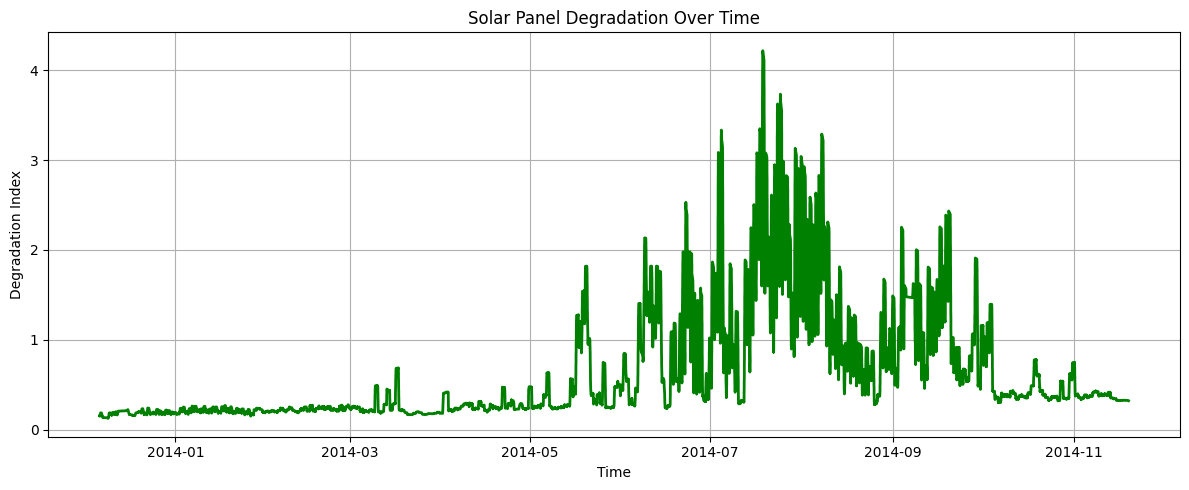

In [41]:
plt.figure(figsize=(12, 5))

plt.plot(
    df.index,
    df["degradation_smooth"],
    color="green",
    linewidth=2
)

plt.xlabel("Time")
plt.ylabel("Degradation Index")
plt.title("Solar Panel Degradation Over Time")

plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
df["efficiency_loss_smooth"] = df["efficiency_loss"].rolling(window=24).mean()

df[["efficiency_loss", "efficiency_loss_smooth"]].head(30)


,efficiency_loss,efficiency_loss_smooth
datetime,,
2013-12-05 13:00:00,-42.492788,NaN
2013-12-05 13:00:00,-21.778329,NaN
2013-12-05 14:00:00,-35.827152,NaN
2013-12-05 14:00:00,-21.470028,NaN
2013-12-05 15:00:00,-20.214524,NaN
2013-12-05 15:00:00,-31.041919,NaN
2013-12-05 16:00:00,2.687042,NaN
2013-12-05 16:00:00,-4.149055,NaN
2013-12-05 17:00:00,4.966202,NaN


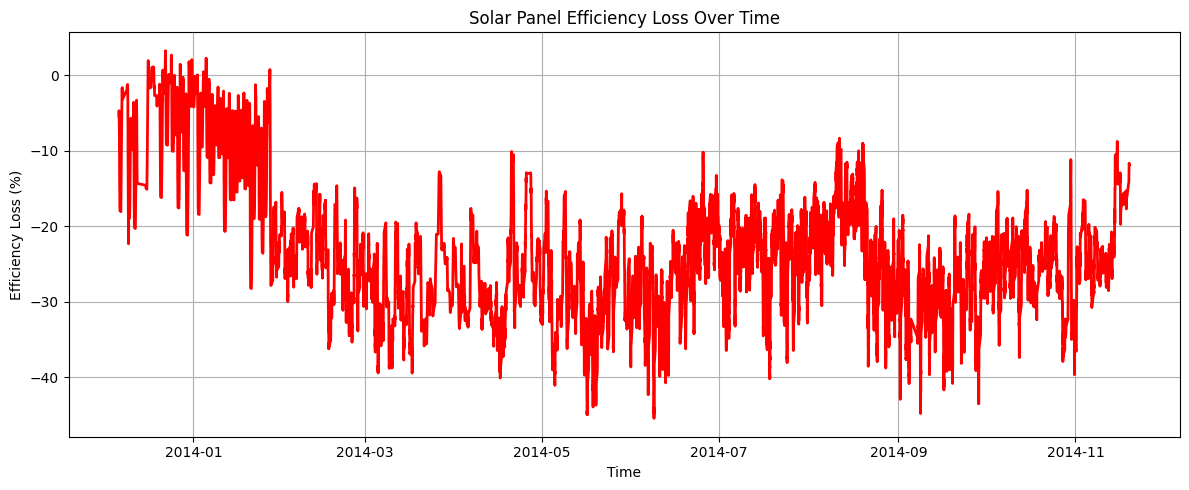

In [43]:
plt.figure(figsize=(12, 5))

plt.plot(
    df.index,
    df["efficiency_loss_smooth"],
    color="red",
    linewidth=2
)

plt.xlabel("Time")
plt.ylabel("Efficiency Loss (%)")
plt.title("Solar Panel Efficiency Loss Over Time")

plt.grid(True)
plt.tight_layout()
plt.show()
